# Deliverable 2 – Mars Weather

## Scrape and Analyze Mars Weather Data

In [43]:
# load dependencies
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

### 1. Visit Site

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

In [44]:
# initiate browser and store url
browser = Browser('chrome')
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'

# visit site
browser.visit(url)

### 2. Scrape Table

Create a BeautifulSoup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, we'll use BeautifulSoup here to continue sharpening our web scraping skills.

In [45]:
# store html content
html = browser.html

# create BeautifulSoup object
html_soup = soup(html, 'html.parser')

# extract all rows of data
table = html_soup.find('table', class_='table')

In [46]:
# close browser connection
browser.quit()

### 3. Store Results

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [47]:
# create empty header and data_rows lists
header = []
data_rows = []

# loop through the scraped data to create a list of rows
for i, row in enumerate(table.find_all('tr')):
    if i==0:
        header = [entry.text for entry in row.find_all('th')]
    else:
        data_rows.append([entry.text for entry in row.find_all('td')])

In [49]:
# create a `pandas` DataFrame by using the list of rows and a list of the column names
mars_weather_df = pd.DataFrame(data_rows, columns=header)

In [50]:
# confirm DataFrame was created successfully
mars_weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### 4. Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

In [51]:
# examine data type of each column
mars_weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [53]:
# change data types for data analysis
mars_weather_df = mars_weather_df.astype({'id':'int',
                                          'sol':'int',
                                          'ls':'int',
                                          'month':'int',
                                          'min_temp':'float',
                                          'pressure':'float'
                                         })

mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])


id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [54]:
# confirm type changes were successful by examining data types again
mars_weather_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### 5. Analyze the Data

Analyze the dataset with `pandas`:

1. How many months exist on Mars?

In [60]:
# the max month integer should be the number of months on Mars
mars_weather_df['month'].max()

12

2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?

In [63]:
# count the length of an array of unique `sol` values
len(mars_weather_df['sol'].unique())

1867

3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.

In [74]:
# group by month and calculate average `min_temp` within each group
avg_min_temp_by_month = mars_weather_df.groupby(['month'])['min_temp'].mean()
avg_min_temp_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

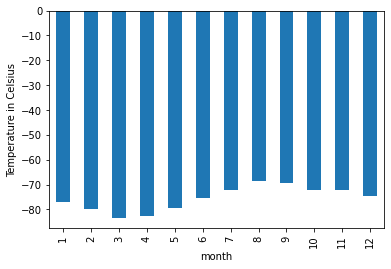

In [80]:
# plot the average temperature by month
avg_min_temp_by_month.plot.bar()
plt.ylabel('Temperature in Celsius')
plt.show()

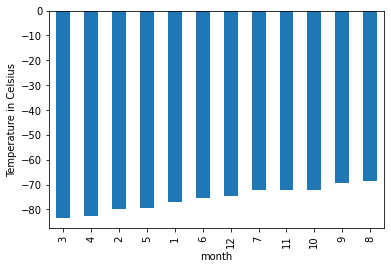

In [84]:
# identify the coldest and hottest months in Curiosity's location
avg_min_temp_by_month.sort_values().plot.bar()
plt.ylabel('Temperature in Celsius')
plt.show()

4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.

In [71]:
# group by month and calculate average pressure
mars_weather_df.groupby(['month'])['pressure'].mean()

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

In [ ]:
# plot the average pressure by month

5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.

In [ ]:
# 5. how many terrestrial (earth) days are there in a Martian year?

### 6. Save the Data

Export the DataFrame to a CSV file.

In [ ]:
# write data to csv